# Report
## Instruction
In this project, we want to classify the tweets crawled from Twitter into 8 classes: anger, anticipation, disgust, fear, sadness, surprise, trust, and joy. The data is already labeled.

I implement TF-IDF with decision tree and random forest, DNN model, BiLSTM model, Bert model, and RoBERTa model as the classifier. The result is that RoBERTa model has the best performance.

## Process
As illustrate in the code of Part_2_2, Part_2_3, and Part_2_4.

## Discussion
## Data Preprocessing
### Split the training/validation set
**I set the random to a constant (42) in order to compare the results precisely.**

### Sampling
From the data distribution, it is obviously that the data is imbalance. Therefore I randomly sample the data based on the number of the least amount of tags - angry, resulting that number of texts with all emotinos are the same. However, the performance of doing random undersampling are worse than taking all the data (undersampling: 0.45949; all data: 0.57336). The first possible reason is that the testing is also imbalance. It can be proved by sending the result with same label (joy: 0.30765; surprise: 0.03483). The second possible reason is that the model need more data to train. However, 30000 texts of each emotions is quite enough for training the models.
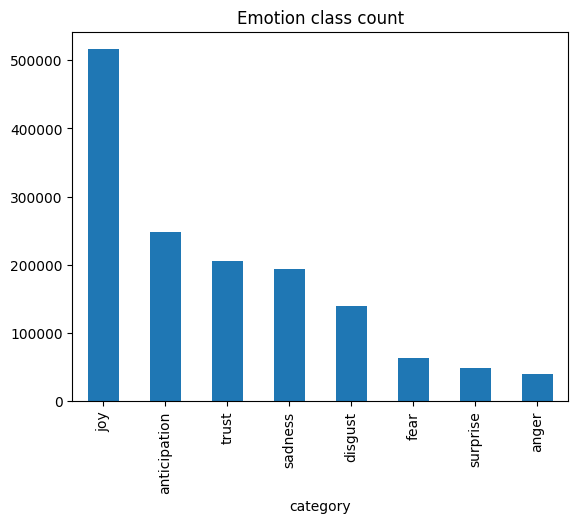

### Lemmatization
In the RoBERTa model, I implement lemmatization to the texts to reduce the complexity of terms.

### Remove punctuation and lower case
To reduce the complexity of terms.

### Remove stopwords
At the beginning, I remove the stopwords in order to reduces the noise of conjunction, particle, and etc. It works in the TF-IDF models. However, in the BiLSTM, Bert, and RoBERTa models, removing stopwords will reduce the performance (In RoBERTa model, remove stopwords: 0.52515; keep stopwords: 0.54638). The reason may because that the stopwords can express the tone of voice. For example, "Why you always do like this!?" is more like an angry emotion, while do the tokenizing, each term doesn't have the angry feeling.

### Hashtags
At the beginning, I didn't take hashtags into consideration since not every text has the hashtags. However, observing the texts, I found that there may have hashtags in the context of the text. Therefore, I add the hashtags to the tail of the text. However, the performances do not change a lot (with hashtags: o.5524; without hashtags: 0.5553), which can consider as an error. We can find that the ont with hashtags is a little bit worse since that the hashtags may be consider as a noise.


## Performance Comparision
### Basic models (TF-IDF with decision tree / random forest, DNN, BiLSTM)
Since I didn't send the results of the following model to Kaggle, I present the validation result of them in the following table. The BiLSTM model has the best performance since it consider the context. 

| Model | Accuracy |
|:-----|-----:|
|TF-IDF+Decision Tree|0.32|
|TF-IDF+Random Forest|0.39|
|DNN|0.36|
|BiLSTM|**0.41**|

### Pre-trained models
The RoBERTa model has the best performance of all. In addition to the better design in RoBERTa model, I use the pre-trained model [cardiffnlp/twitter-roberta-base-sentiment-latest](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment). The training data of this model is more similar with our data, resulting a better performance.

| Model | Accuracy |
|:-----|-----:|
|Bert|0.52569|
|RoBERTa|**0.57336**|

## Improvement
1. **convert emoticon and emoji to words**: There are many emoticons and emojis in tweets. Both of emoticon and emoji express some important sign of emotion. However, they will be removed at the preprocessing part. Therefore, converting them to words may help extraction the emotion of texts.
2. **convert the hashtags to the attribite related to the emotions**: Instead of adding hashtags to the tail of texts, I think that converting hashtags to word vectors and relating them to emotions may affect the predictions. 
3. **spelling and abbreviation correction**: Reduce the noise.